In [ ]:
import pandas as pd

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-08 09:30:51           4522  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2594  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            281  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            626  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d yelp-dataset/yelp-dataset

100% 4.92G/4.92G [01:07<00:00, 94.9MB/s]
100% 4.92G/4.92G [01:07<00:00, 78.1MB/s]


In [ ]:
!ls

kaggle.json  sample_data  yelp-dataset.zip


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  yelp-dataset.zip
  inflating: Dataset_User_Agreement.pdf  
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_checkin.json  
  inflating: yelp_academic_dataset_review.json  
  inflating: yelp_academic_dataset_tip.json  
  inflating: yelp_academic_dataset_user.json  


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle'
%cd /content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [ ]:
from time import time
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_rows(file_path, nrows=None, only_return_count=False, verbose=True):
    """
    Returns dataframe from json file
    """
    tic = time()
    with open(file_path) as json_file:
        count = 0
        objs = []
        line = json_file.readline()
        while (nrows is None or count<nrows) and line:
            count += 1
            if not only_return_count:
                obj = json.loads(line)
                objs.append(obj)
            line = json_file.readline()
        toc = time()
        if verbose:
            print(file_path.split('/')[-1], 'loaded. Count =', count, ', Time =', round(toc-tic,2), 'secs.')
        
        if only_return_count:
            return count
        
        return pd.DataFrame(objs)
    
    
#data generator to load data in chunks
def load_rows_gen(file_path, nrows=1e6, verbose=True):
    """
    Returns data in chunks
    """
    with open(file_path) as json_file:
        line = json_file.readline()
        total = 0
        while line:
            count = 0
            objs = []
            tic = time()
            while count<nrows and line:
                count+=1
                obj = json.loads(line)
                objs.append(obj)
                line = json_file.readline()
                total += count
            toc = time()
            print('Loaded chunk of size:', count, ", Time =", round(toc-tic,2), 'secs.')
            yield pd.DataFrame(objs)

***LOADING THE DATASET***

In [ ]:
filename = 'yelp_academic_dataset_business.json'
biz_data = load_rows(filename, 50000)
biz_data.shape

yelp_academic_dataset_business.json loaded. Count = 50000 , Time = 2.9 secs.


(50000, 14)

In [ ]:
biz_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [ ]:
biz_data.groupby('state')['business_id'].count()

state
AZ        1
BC     5381
CA        3
CO      996
FL     6910
GA     5606
IL        1
KS        1
MA    11256
NC        1
NM        1
NY        1
OH     3400
OK        1
OR     7791
TX     7641
WA     1009
Name: business_id, dtype: int64

In [ ]:
filename = 'yelp_academic_dataset_review.json'
rev_data = load_rows(filename, 50000)
rev_data.shape

yelp_academic_dataset_review.json loaded. Count = 50000 , Time = 1.33 secs.


(50000, 9)

In [ ]:
rev_data.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03
6,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2.0,0,0,0,"The setting is perfectly adequate, and the foo...",2006-04-16 02:58:44
7,9vqwvFCBG3FBiHGmOHMmiA,XGkAG92TQ3MQUKGX9sLUhw,DbXHNl890xSXNiyRczLWAg,5.0,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13
8,2l_TDrQ7p-5tANOyiOlkLQ,LWUnzwK0ILquLLZcHHE1Mw,mD-A9KOWADXvfrZfwDs-jw,4.0,1,0,0,I am definitely a fan of Sports Authority. Th...,2012-05-28 15:00:47
9,KKVFopqzcVfcubIBxmIjVA,99RsBrARhhx60UnAC4yDoA,EEHhKSxUvJkoPSzeGKkpVg,5.0,0,0,0,I work in the Pru and this is the most afforda...,2014-05-07 18:10:21


In [ ]:
a = biz_data[biz_data['categories'].str.contains('Restaurant') == True]
rev = rev_data[rev_data.business_id.isin(a['business_id']) == True]

In [ ]:
len(rev)

34905

In [ ]:
rev.head(10)
rev.shape

(34905, 9)

***VISUALISATION OF THE DATA***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


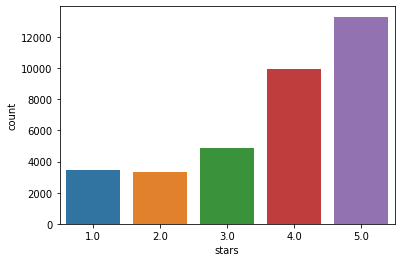

In [ ]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='City',data=dfs)

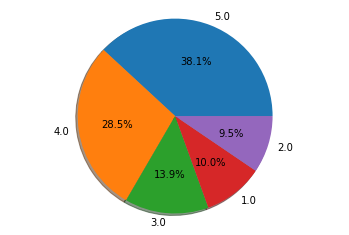

In [ ]:
labels = rev['stars'].value_counts().index
sizes = rev['stars'].value_counts().values   
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

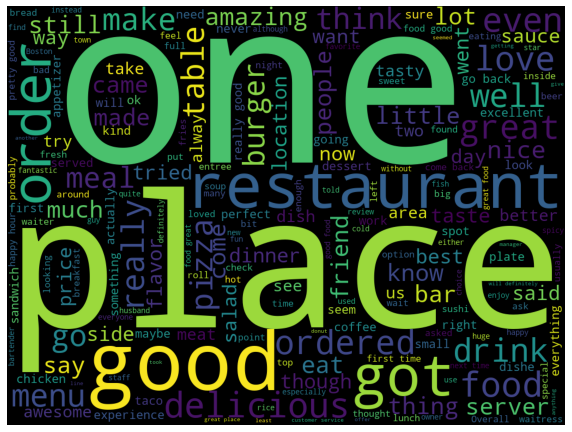

In [ ]:
from wordcloud import WordCloud
text = rev['text']
plt.subplots(figsize = (10,10))
wordcloud = WordCloud(background_color='black', width=1024, height=768).generate(' '.join(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
data = rev[['text','stars']]
data.shape

(34905, 2)

In [ ]:
data.head(10)

,text,stars
0,Apparently Prides Osteria had a rough summer a...,4.0
3,I've stayed at many Marriott and Renaissance M...,2.0
4,The food is always great here. The service fro...,4.0
5,"This place used to be a cool, chill place. Now...",1.0
6,"The setting is perfectly adequate, and the foo...",2.0
7,Probably one of the better breakfast sandwiche...,5.0
9,I work in the Pru and this is the most afforda...,5.0
10,"They NEVER seem to get our \norder correct, se...",1.0
12,I have been here twice and have had really goo...,4.0
14,This is a five-star restaurant if ever I have ...,5.0


In [ ]:
data['stars'].value_counts()

5.0    13307
4.0     9943
3.0     4862
1.0     3478
2.0     3315
Name: stars, dtype: int64

***ADDING LABELS TO THE DATAFRAME***

In [ ]:
labels = []
for star in data['stars']:
    if star==1.0 or star==2.0:
        labels.append(-1)
    elif star==4.0 or star==5.0:
        labels.append(1)
    else:
        labels.append(0)
data['new_stars'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data.head(10)

,text,stars,new_stars
0,Apparently Prides Osteria had a rough summer a...,4.0,1
3,I've stayed at many Marriott and Renaissance M...,2.0,-1
4,The food is always great here. The service fro...,4.0,1
5,"This place used to be a cool, chill place. Now...",1.0,-1
6,"The setting is perfectly adequate, and the foo...",2.0,-1
7,Probably one of the better breakfast sandwiche...,5.0,1
9,I work in the Pru and this is the most afforda...,5.0,1
10,"They NEVER seem to get our \norder correct, se...",1.0,-1
12,I have been here twice and have had really goo...,4.0,1
14,This is a five-star restaurant if ever I have ...,5.0,1


In [ ]:
data = data.drop('stars', 1)
data.columns = ['text', 'stars']

In [ ]:
data.head(20)

,text,stars
0,Apparently Prides Osteria had a rough summer a...,1
3,I've stayed at many Marriott and Renaissance M...,-1
4,The food is always great here. The service fro...,1
5,"This place used to be a cool, chill place. Now...",-1
6,"The setting is perfectly adequate, and the foo...",-1
7,Probably one of the better breakfast sandwiche...,1
9,I work in the Pru and this is the most afforda...,1
10,"They NEVER seem to get our \norder correct, se...",-1
12,I have been here twice and have had really goo...,1
14,This is a five-star restaurant if ever I have ...,1


In [ ]:
sample_size = 6000 # Above 20% of the original size
sample = data.sample(sample_size)
sample = sample.reset_index(drop=True)

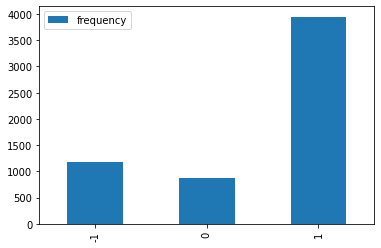

In [ ]:
plot_stars_frequencies(sample)

***PREPROCESSING WORK***

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
sample['text'] = sample['text'].apply(remove_punctuation)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
    from nltk.corpus import stopwords
    '''a function for removing the stopword'''
    sw = stopwords.words('english')
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
sample['text'] = sample['text'].apply(remove_stopwords)

In [ ]:
def stemming(text): 
    '''a function which stems each word in the given text'''
    from nltk.stem.snowball import SnowballStemmer
    stemmer = SnowballStemmer("english")
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
sample['text'] = sample['text'].apply(stemming)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
# create a count vectorizer object
vectorizer = TfidfVectorizer(dtype=np.float32)
# fit the count vectorizer using the text data
tfidf_matrix = vectorizer.fit_transform(sample['text'].values)

print(len(vectorizer.get_feature_names()))

16512


In [ ]:
def get_word_freq(tfidf, vectorizer):
    return sorted([(tfidf.getcol(idx).sum(), word)
                   for word, idx in vectorizer.vocabulary_.items()],
                  reverse=True)

words_tfidf_scores = get_word_freq(tfidf_matrix, vectorizer)

In [ ]:
# transform tfidf scores matrix into pandas dataframe
words_tfidf_scores_df = pd.DataFrame(words_tfidf_scores, dtype=np.float32) 
words_tfidf_scores_df.columns = ['tfidf_score', 'token']
words_tfidf_scores_df = words_tfidf_scores_df.set_index('token')

In [ ]:

words_tfidf_scores_df.head()

,tfidf_score
token,
food,231.794891
good,209.265564
place,196.844482
great,190.101440
servic,145.307312


In [ ]:
words_tfidf_scores_df.info()
words_tfidf_scores_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, food to bpm
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tfidf_score  16512 non-null  float32
dtypes: float32(1)
memory usage: 193.5+ KB


(16512, 1)

***HISTOGRAM OF THE 100 HIGHEST WORDS***

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

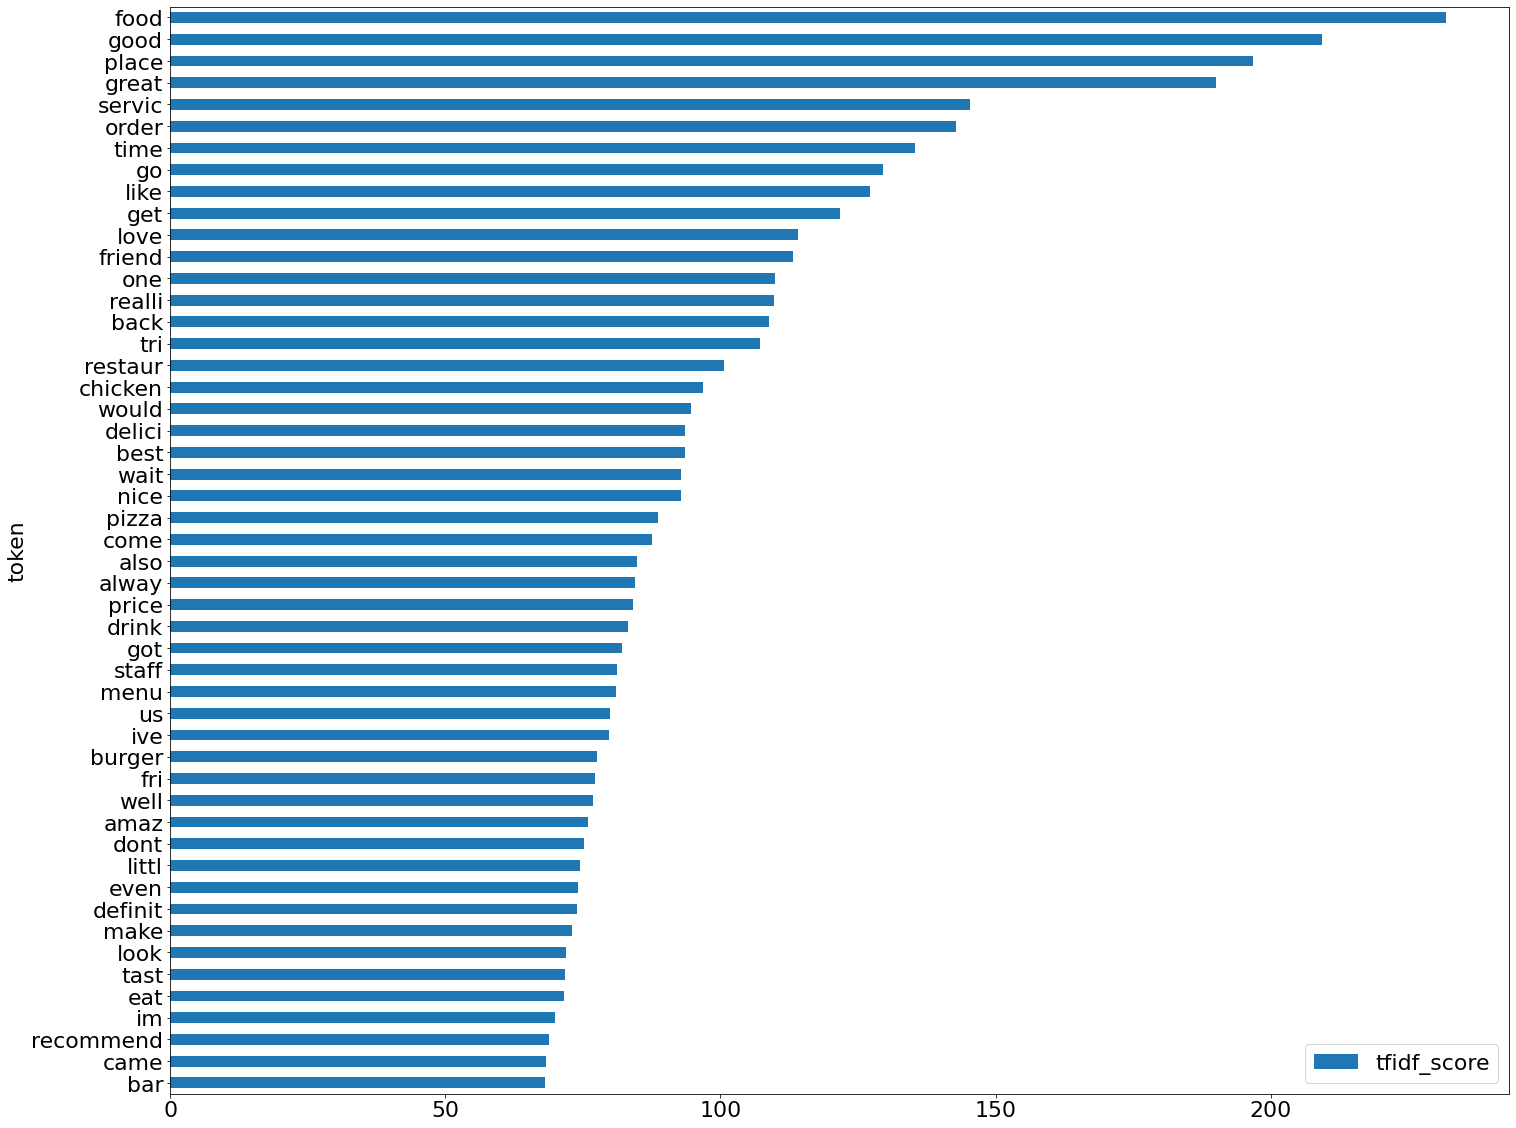

In [ ]:
plt.rcParams['figure.figsize'] = (24,20)
plt.rcParams['font.size'] = 22
ax = words_tfidf_scores_df.head(50).plot(kind='barh')
ax.invert_yaxis()

***HISTOGRAM OF THE 100 LOWEST WORDS***

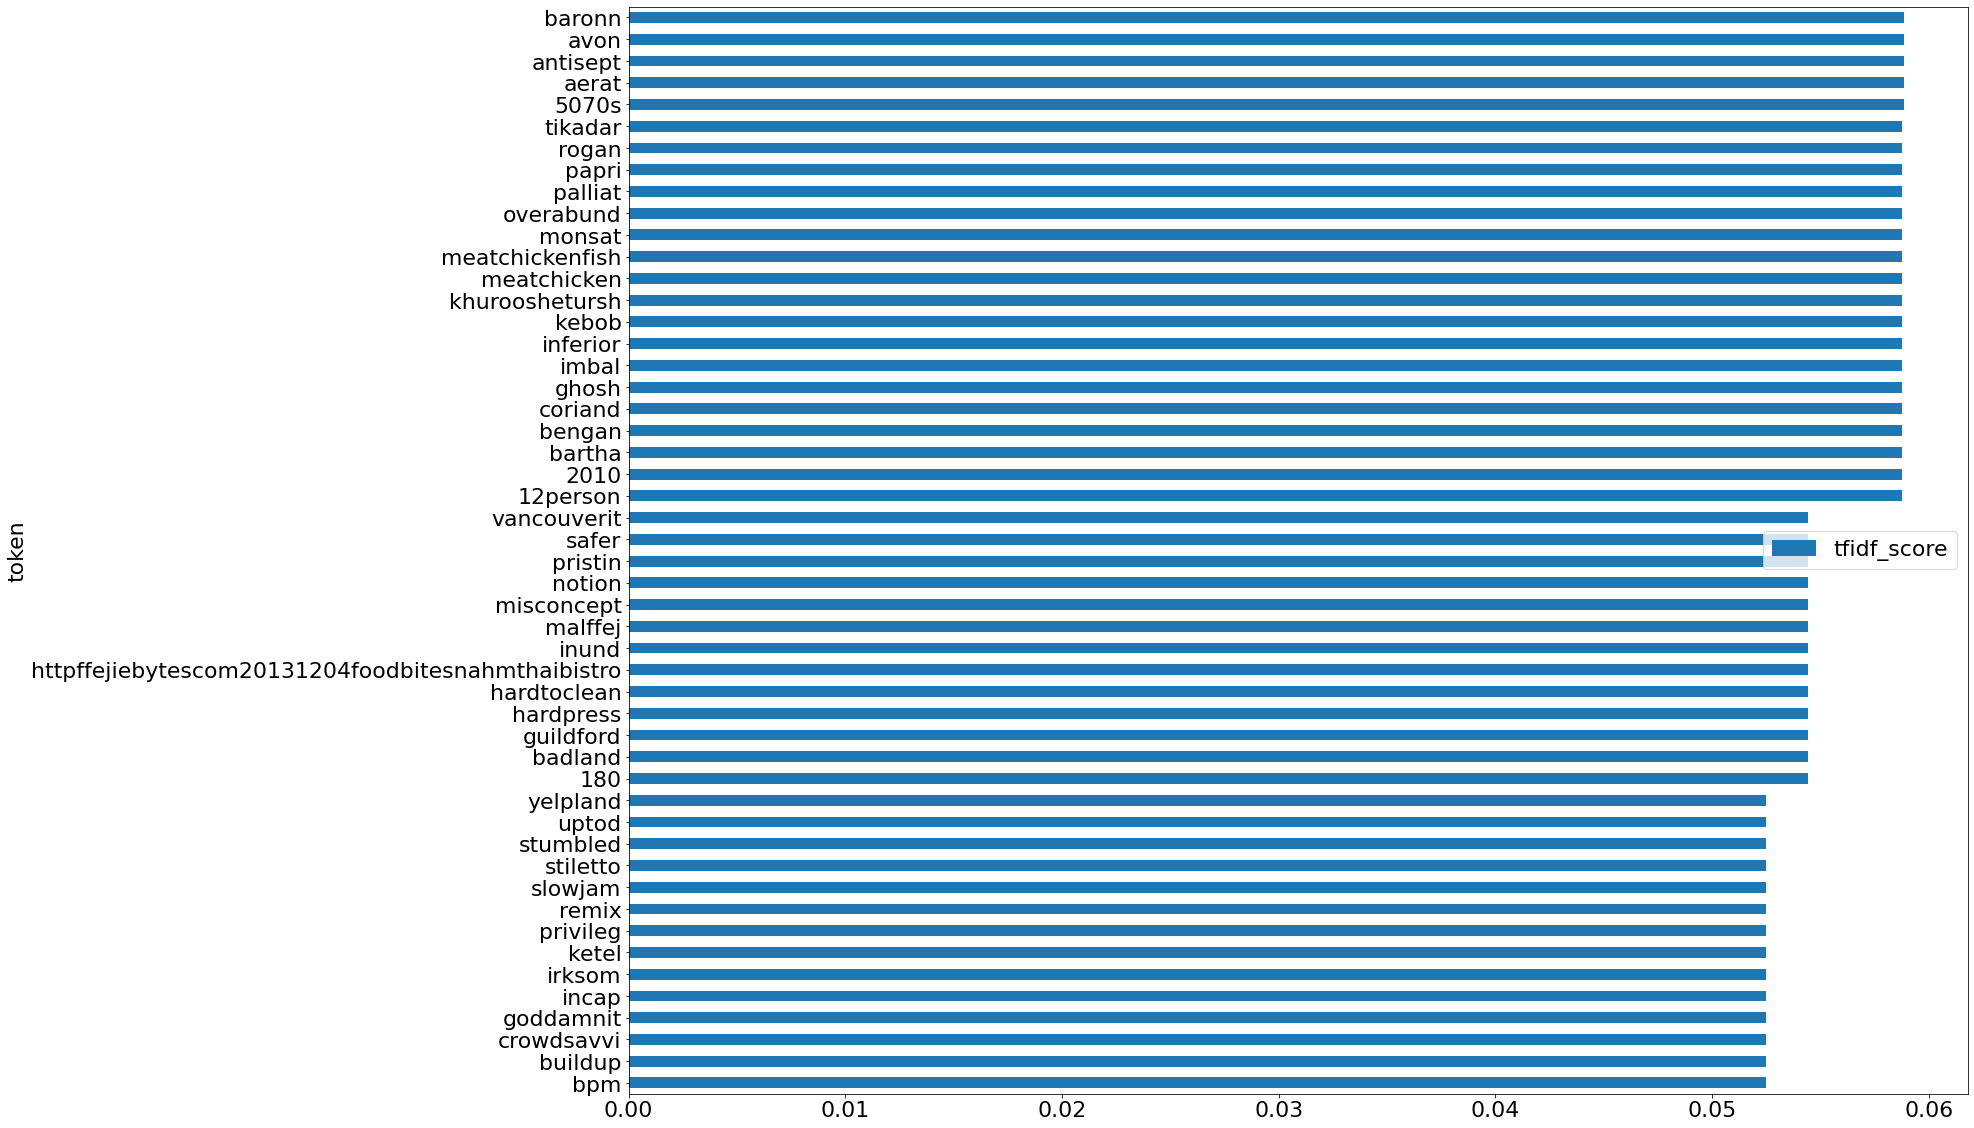

In [ ]:
plt.rcParams['figure.figsize'] = (24,20)
plt.rcParams['font.size'] = 22
ax = words_tfidf_scores_df.tail(50).plot(kind='barh')
ax.invert_yaxis()

In [ ]:
def getKey(dict, value):
    '''get dictionnary key from its value'''
    
    return [key for key in dict.keys() if (dict[key] == value)][0]

In [ ]:
top_features_size = 1001

top_features_names = words_tfidf_scores_df.index.values[:top_features_size] # Extracting the top 20% features' names

# And their corresponding indices from the 'vectorizer.vocabulary_' dictionnary
top_features_indices = [
    vectorizer.vocabulary_.get(top_features_names[i]) for i in range(len(top_features_names))
]

# Creating the final dataframe from the tfidf_matrix with respect to the top features
final_df = pd.DataFrame()

for top_feature_index in top_features_indices:
    final_df[getKey(vectorizer.vocabulary_, top_feature_index)] = pd.Series(tfidf_matrix.getcol(top_feature_index).toarray().ravel())

final_df['stars'] = sample['stars']

final_df.head()

,food,good,place,great,servic,order,time,go,like,get,love,friend,one,realli,back,tri,restaur,chicken,would,delici,best,wait,nice,pizza,come,also,alway,price,drink,got,staff,menu,us,ive,burger,fri,well,amaz,dont,littl,...,pepperoni,omelett,shot,hold,offic,mine,balanc,girlfriend,juic,milkshak,leftov,correct,negat,quesadilla,ring,popular,sell,per,desert,hate,smoothi,mango,flavour,posit,plantain,frozen,soda,stomach,youv,craft,load,alon,sangria,ethiopian,chop,falafel,entertain,40,crepe,stars
0,0.000000,0.000000,0.000000,0.104526,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.082364,0.180625,0.089585,0.101201,0.106382,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.122348,0.118004,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.136944,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.114166,0.125183,0.248348,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.176035,0.000000,0.000000,0.0,0.0,0.170479,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.147707,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.088283,0.0,0.0,0.342589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093919,0.0,0.0,0.0,0.090423,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,0.000000,0.047732,0.000000,0.000000,0.056226,0.0,0.0,0.0,0.057783,0.000000,0.000000,0.000000,0.062368,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.072378,0.0,0.0,0.374492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
plt.rcParams["figure.figsize"] = (12,10)

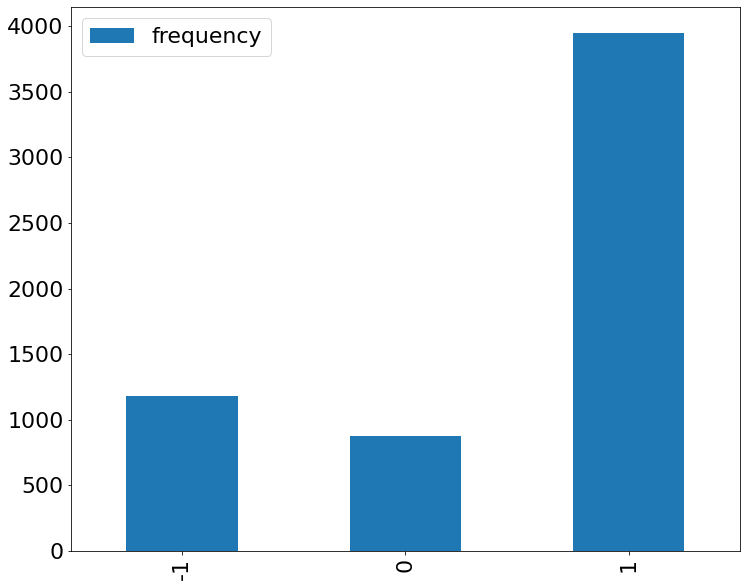

In [ ]:
plot_stars_frequencies(final_df)


In [ ]:
def pretty_print_cm(cm, labels, normalize=False):
    """pretty print confusion matrices"""
    import seaborn as sns
    from sklearn.preprocessing import scale
    
    title = 'Confusion matrix'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = ' '.join(['Normalized', title])
    
    conf_mat = pd.DataFrame(cm, columns=labels, index=labels)
    conf_mat.index.name = 'True \ Predicted'
    plt.figure(figsize=(16,10))
    ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)
    ax.margins(2,2)
    plt.show()

In [ ]:
def generate_prediction_results(y_true, y_pred):
    """generate classification report and confusion matrix on a given true and predicted values"""
    from sklearn.metrics import classification_report, confusion_matrix

    conf_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)
    return conf_mat, class_report

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop(['stars'], 1)
y = final_df['stars']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

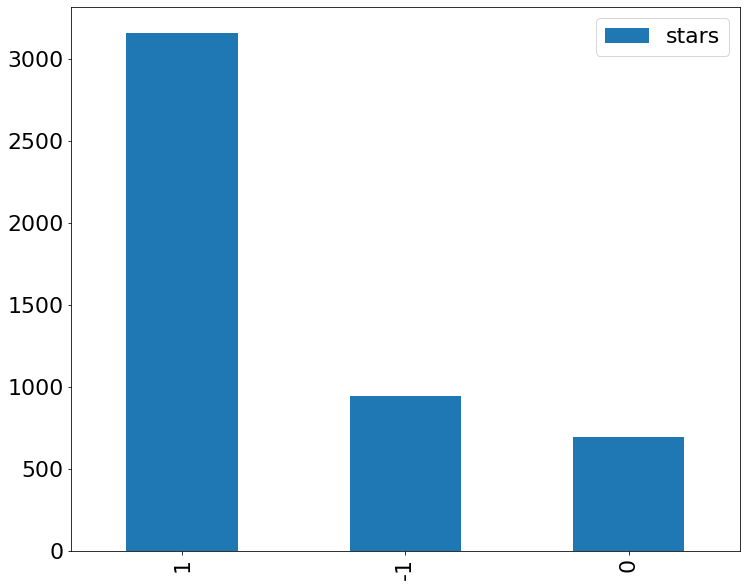

In [ ]:
pd.DataFrame(y_train.value_counts()).plot(kind='bar')

***BALANCING THE DATASET***

In [ ]:
from imblearn.over_sampling import SMOTE  #Synthetic Minority OverSampling

sm = SMOTE()
x_cols = X_train.columns
X_train, y_train = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=x_cols)
y_train = pd.Series(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

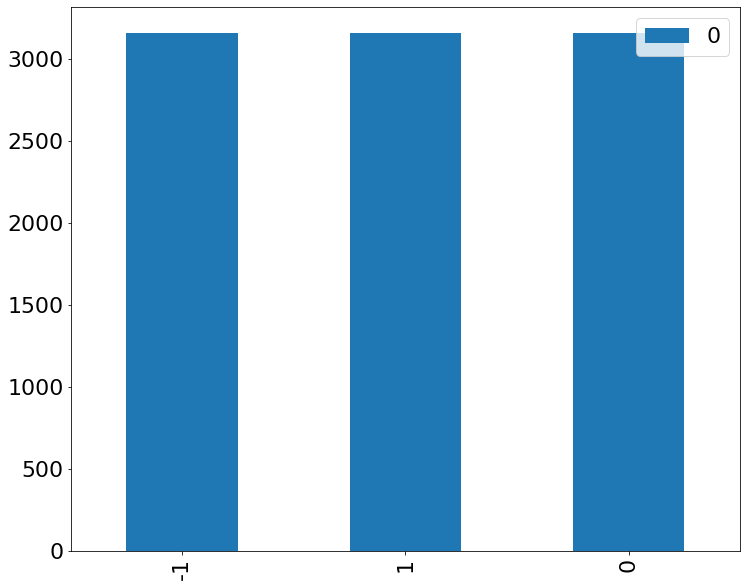

In [ ]:
pd.DataFrame(y_train.value_counts()).plot(kind='bar')

***NAIVE BAYES***

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
NB_predictions_test = clf.predict(X_test)
NB_predictions_train = clf.predict(X_train)

In [ ]:
NB_confusion_matrix_test, NB_classification_report_test = generate_prediction_results(y_test, NB_predictions_test)
NB_confusion_matrix_train, NB_classification_report_train = generate_prediction_results(y_train, NB_predictions_train)

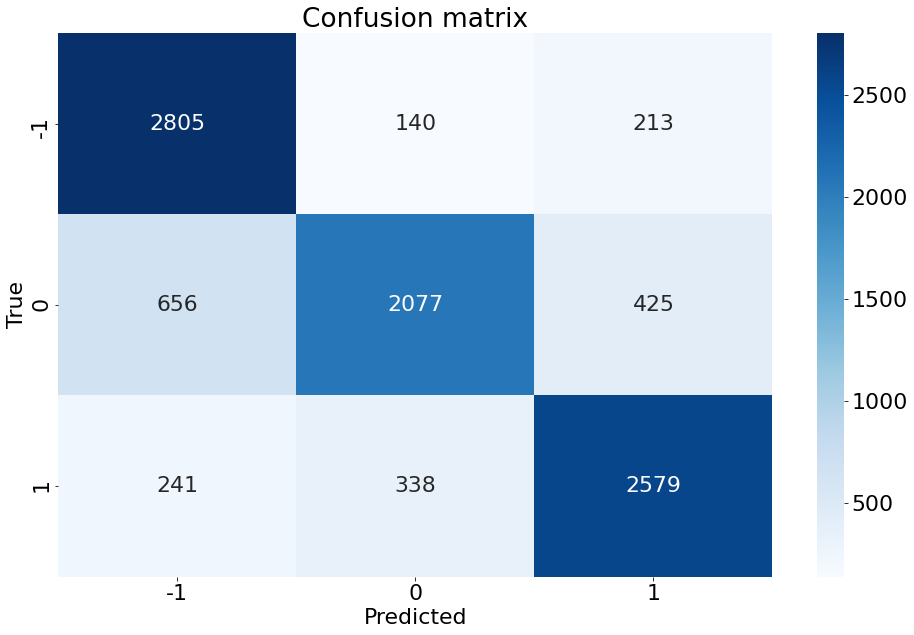

In [ ]:
labels = [-1, 0, 1]
pretty_print_cm(NB_confusion_matrix_train, labels)

In [ ]:
pd.DataFrame(NB_classification_report_train)

,-1,0,1,accuracy,macro avg,weighted avg
precision,0.757699,0.812916,0.801679,0.787524,0.790764,0.790764
recall,0.888220,0.657695,0.816656,0.787524,0.787524,0.787524
f1-score,0.817784,0.727114,0.809098,0.787524,0.784665,0.784665
support,3158.000000,3158.000000,3158.000000,0.787524,9474.000000,9474.000000


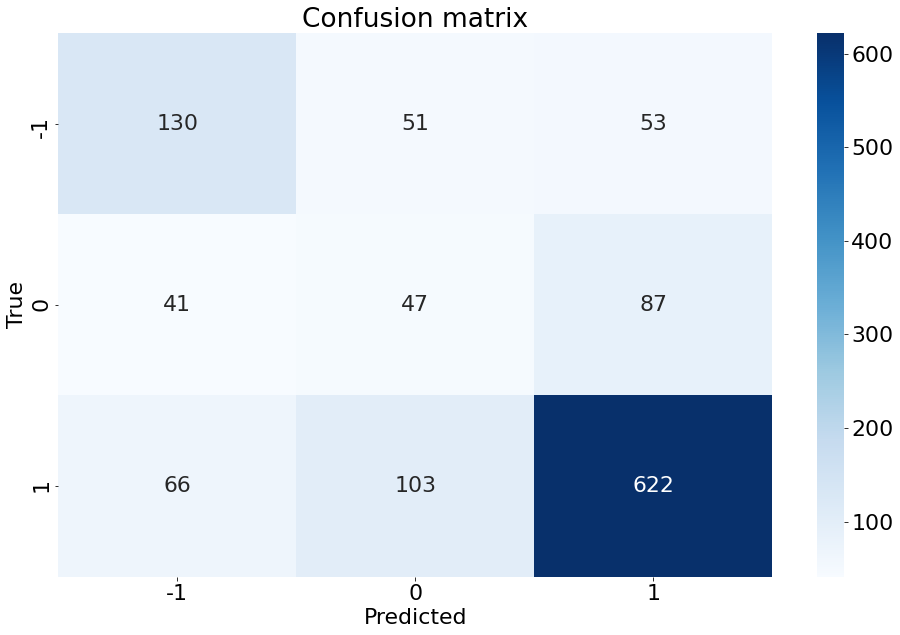

In [ ]:
labels = [-1, 0, 1]
pretty_print_cm(NB_confusion_matrix_test, labels)

In [ ]:
print('Classification report: \n')
pd.DataFrame(NB_classification_report_test)

Classification report: 



,-1,0,1,accuracy,macro avg,weighted avg
precision,0.548523,0.233831,0.816273,0.665833,0.532876,0.679122
recall,0.555556,0.268571,0.786346,0.665833,0.536824,0.665833
f1-score,0.552017,0.250000,0.801030,0.665833,0.534349,0.672114
support,234.000000,175.000000,791.000000,0.665833,1200.000000,1200.000000


***MULTINOMIAL NAIVE BAYES***

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
MNB_predictions_train = clf.predict(X_train)
MNB_predictions_test = clf.predict(X_test)

In [ ]:
MNB_confusion_matrix_train, MNB_classification_report_train = generate_prediction_results(y_train, MNB_predictions_train)

***CONFUSION MATRIX FOR TRAIN DATASET***

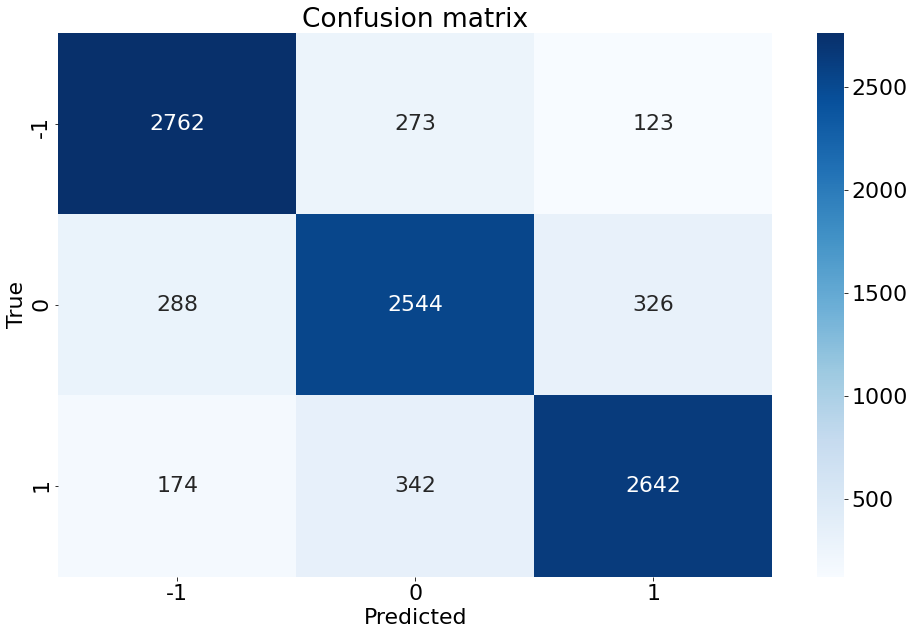

In [ ]:
labels = [-1, 0, 1]
pretty_print_cm(MNB_confusion_matrix_train, labels)

In [ ]:
pd.DataFrame(MNB_classification_report_train)

,-1,0,1,accuracy,macro avg,weighted avg
precision,0.856700,0.805318,0.854740,0.838928,0.838919,0.838919
recall,0.874604,0.805573,0.836605,0.838928,0.838928,0.838928
f1-score,0.865559,0.805446,0.845575,0.838928,0.838860,0.838860
support,3158.000000,3158.000000,3158.000000,0.838928,9474.000000,9474.000000


In [ ]:
MNB_confusion_matrix_test, MNB_classification_report_test = generate_prediction_results(y_test, MNB_predictions_test)

***CONFUSION MATRIX ON TEST-SET***

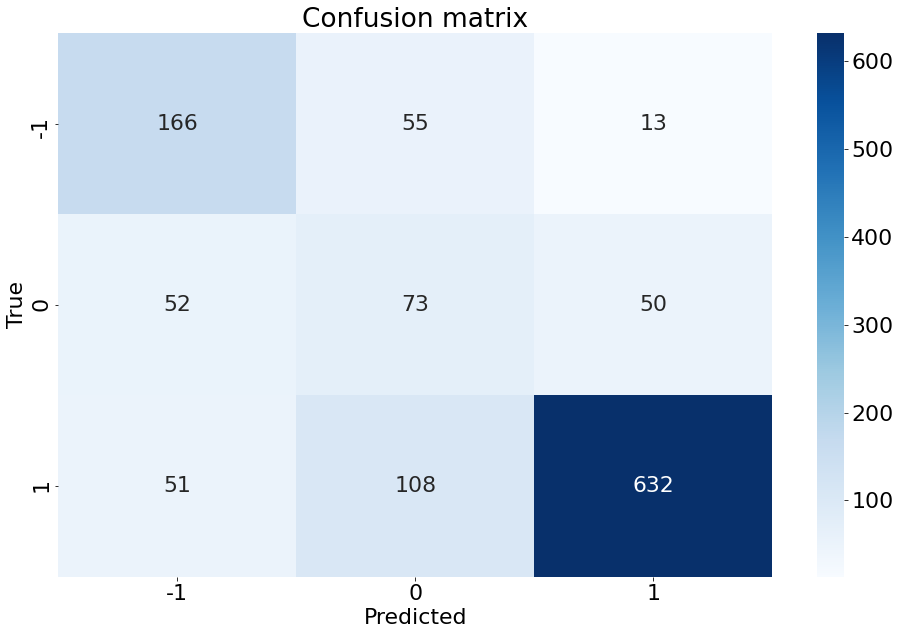

In [ ]:
# Confusion matrix
labels = [-1, 0, 1]
pretty_print_cm(MNB_confusion_matrix_test, labels)

In [ ]:
pd.DataFrame(MNB_classification_report_test)

,-1,0,1,accuracy,macro avg,weighted avg
precision,0.617100,0.309322,0.909353,0.725833,0.611925,0.764859
recall,0.709402,0.417143,0.798989,0.725833,0.641844,0.725833
f1-score,0.660040,0.355231,0.850606,0.725833,0.621959,0.741203
support,234.000000,175.000000,791.000000,0.725833,1200.000000,1200.000000
